In [ ]:
``````````````````````````````````````````````````````````

In [2]:
import kagglehub
import os

# Download dataset from Kaggle and get the base path
base_path = kagglehub.dataset_download("surajit651/souvikdataset")

# Point dataset_path to the 'train' folder inside downloaded dataset
dataset_path = os.path.join(base_path, "SOUVIK", "train")

print("Dataset downloaded at:", dataset_path)


Dataset downloaded at: C:\Users\shafe\.cache\kagglehub\datasets\surajit651\souvikdataset\versions\1\SOUVIK\train


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Dataset parameters
dataset_path = r"C:\Users\shafe\.cache\kagglehub\datasets\surajit651\souvikdataset\versions\1\SOUVIK\train"
img_height, img_width = 128, 128
batch_size = 32
epochs = 10

In [5]:
# Data augmentation and rescaling with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [6]:
# Load training data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

Found 1376 images belonging to 2 classes.


In [7]:
# Load validation data
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 344 images belonging to 2 classes.


In [8]:
# Build CNN model with Input layer to avoid warnings
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [9]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Train model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)


C:\Users\shafe\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 236s 5s/step - accuracy: 0.6207 - loss: 0.8052 - val_accuracy: 0.7674 - val_loss: 0.4802
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 216s 4s/step - accuracy: 0.7810 - loss: 0.4768 - val_accuracy: 0.7093 - val_loss: 0.5229
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3805s 90s/step - accuracy: 0.7645 - loss: 0.4928 - val_accuracy: 0.7733 - val_loss: 0.4456
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.8182 - loss: 0.4118 - val_accuracy: 0.7965 - val_loss: 0.4231
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 232s 5s/step - accuracy: 0.8128 - loss: 0.3968 - val_accuracy: 0.7965 - val_loss: 0.3834
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 190s 4s/step - accuracy: 0.8426 - loss: 0.3440 - val_accuracy: 0.8140 - val_loss: 0.3521
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 243s 5s/step - accuracy: 0.8441 - loss: 0.3526 - val_accuracy: 0.8343 - val_loss: 0.3466
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 189s 4s/step - accuracy: 0.8645 - loss: 0.3074 - val_accuracy: 0.8488 -

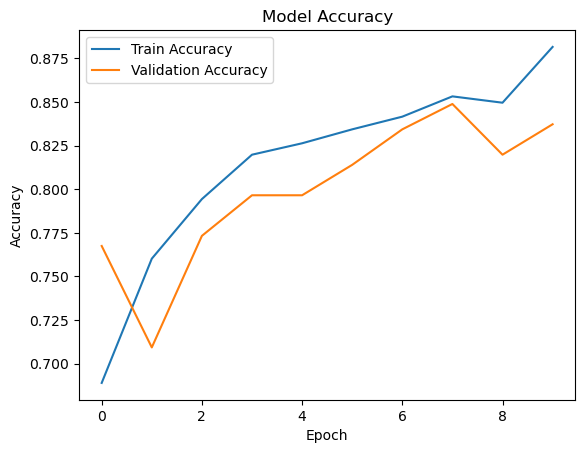

In [11]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

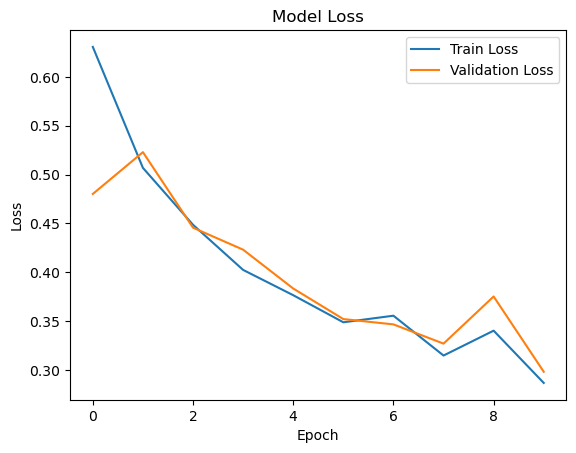

In [12]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [13]:
# Evaluate model performance on validation data
val_data.reset()  # Important: reset before predicting
y_pred_probs = model.predict(val_data)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()
y_true = val_data.classes

11/11 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step


In [14]:
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Confusion Matrix:
[[144  32]
 [ 25 143]]


In [15]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(train_data.class_indices.keys())))


Classification Report:
              precision    recall  f1-score   support

  no-plastic       0.85      0.82      0.83       176
     plastic       0.82      0.85      0.83       168

    accuracy                           0.83       344
   macro avg       0.83      0.83      0.83       344
weighted avg       0.84      0.83      0.83       344



In [16]:
model.save('plastic_classifier_model.keras')

In [17]:
from tensorflow.keras.models import load_model
model = load_model('plastic_classifier_model.keras')

In [ ]:
.....................................................................................................................

In [1]:
# test

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

# Define paths and parameters
dataset_path = r"C:\Users\shafe\.cache\kagglehub\datasets\surajit651\souvikdataset\versions\1\SOUVIK"
test_path = os.path.join(dataset_path, "test")
img_height, img_width = 128, 128
batch_size = 32

# Load the trained model
model = load_model("plastic_classifier_model.keras")

# Prepare the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Predict on the test data
y_pred_probs = model.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()
y_true = test_data.classes

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(test_data.class_indices.keys())))


Found 430 images belonging to 2 classes.


C:\Users\shafe\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 93s 6s/step
Confusion Matrix:
[[151  69]
 [ 47 163]]

Classification Report:
              precision    recall  f1-score   support

  no-plastic       0.76      0.69      0.72       220
     plastic       0.70      0.78      0.74       210

    accuracy                           0.73       430
   macro avg       0.73      0.73      0.73       430
weighted avg       0.73      0.73      0.73       430

